In [ ]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Colab Notebooks/FT5005 Final")
"""

Mounted at /content/drive


In [ ]:
data = pd.read_csv("final_v5_dataset.csv", index_col = False)
data.head()

,Unnamed: 0,time,ticker,abnormal_return,y,volatility,reaction_positive,reaction_negative,volume_adi,volume_mfi,...,item7_polarity,item7_subjectivity,industry_B,industry_C,industry_D,industry_E,industry_F,industry_G,industry_H,industry_I
0,0,2006,nwpx,0.635924,1,0.062822,5,6,-3.515938e+05,50.359009,...,0.519824,0.313428,0,0,1,0,0,0,0,0
1,1,2007,nwpx,0.026142,1,0.147784,5,6,-1.440436e+06,57.280553,...,0.487179,0.326236,0,0,1,0,0,0,0,0
2,2,2008,nwpx,-0.762775,0,0.180493,3,8,-1.414003e+06,53.844115,...,0.490050,0.307105,0,0,1,0,0,0,0,0
3,3,2010,nwpx,0.210231,1,0.075963,10,1,-4.214262e+06,50.947005,...,0.429119,0.321627,0,0,1,0,0,0,0,0
4,4,2011,nwpx,-0.013295,0,0.161627,6,5,-4.860406e+06,49.961210,...,0.500000,0.309386,0,0,1,0,0,0,0,0


In [ ]:
y=data['y']
X=data.iloc[:,5:]

In [ ]:
columns = X.columns

In [ ]:
# data processing for imbalanced data 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE 
standardizer = StandardScaler()
sm = SMOTE(random_state=42) 
X_sm, y_sm = sm.fit_resample(X, y) 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size = 0.2)
standardizer.fit(X_train) 
X_train = standardizer.transform(X_train) 
X_test = standardizer.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
y_train_df = pd.DataFrame(y_train.reset_index(), columns = ['y'])
X_test_df = pd.DataFrame(X_test, columns = X.columns)
y_test_df = pd.DataFrame(y_test.reset_index(), columns = ['y'])

In [ ]:
xgb_classifier = xgb.XGBClassifier(gamma=0,n_estimators=260,max_depth=11,min_child_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False,random_state = 88)
xgb_classifier.fit(X_train,y_train)
lgbm_classifier = lgb.LGBMClassifier(max_depth=7,reg_alpha=0, min_child_weight=1,random_state = 88, n_estimators=120)
lgbm_classifier.fit(X_train,y_train)
rf_classifier = RandomForestClassifier(max_features=5,min_samples_leaf=4,max_depth=12, n_estimators=200,random_state = 88)
rf_classifier.fit(X_train,y_train)
tree_classifier =  DecisionTreeClassifier(min_samples_leaf=10,max_depth=12,random_state = 88,splitter='random')
tree_classifier.fit(X_train,y_train)
gb_classifier = GradientBoostingClassifier(max_depth=12, n_estimators=260,random_state = 88)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=12, n_estimators=260, random_state=88)

## Section 1 Feature Importance

### Xgboost

Text(0.5, 1.0, 'Xgboost Feature Importance')

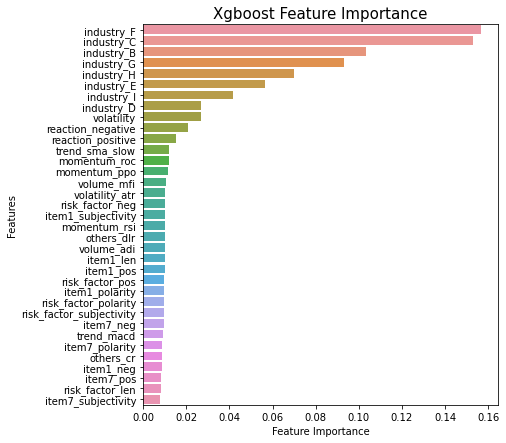

In [ ]:
fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X.columns, 'Feature Importance': xgb_classifier.feature_importances_}).sort_values("Feature Importance", ascending = False)
sns.barplot(y = "Features", x = "Feature Importance", data = feat_imp)
ax1.set_title("Xgboost Feature Importance", size = 15)

### LightGBM

Text(0.5, 1.0, 'LightGBM Feature Importance')

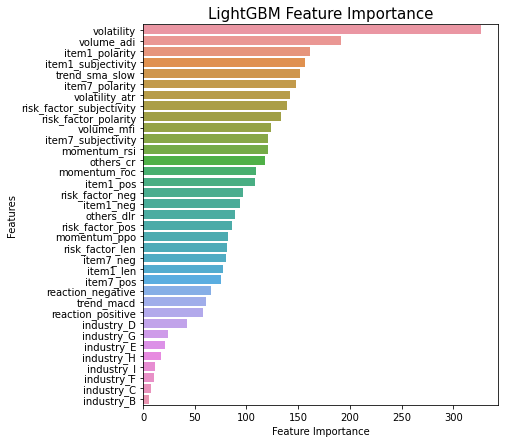

In [ ]:
fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X.columns, 'Feature Importance': lgbm_classifier.feature_importances_}).sort_values("Feature Importance", ascending = False)
sns.barplot(y = "Features", x = "Feature Importance", data = feat_imp)
ax1.set_title("LightGBM Feature Importance", size = 15)

### Random Forest

Text(0.5, 1.0, 'Random Forest Feature Importance')

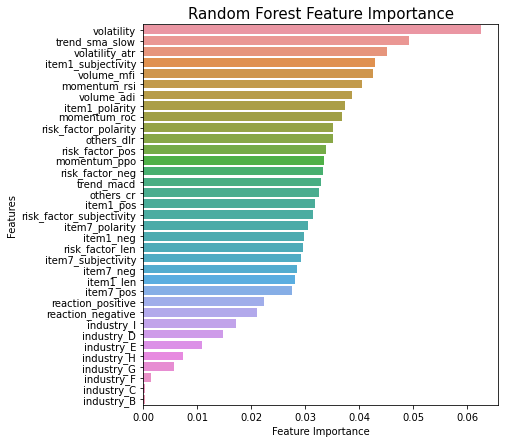

In [ ]:
fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X.columns, 'Feature Importance': rf_classifier.feature_importances_}).sort_values("Feature Importance", ascending = False)
sns.barplot(y = "Features", x = "Feature Importance", data = feat_imp)
ax1.set_title("Random Forest Feature Importance", size = 15)

### Decision Tree

Text(0.5, 1.0, 'Decision Tree Feature Importance')

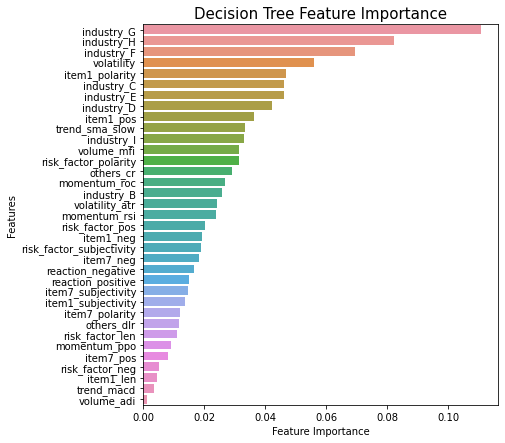

In [ ]:
fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X.columns, 'Feature Importance': tree_classifier.feature_importances_}).sort_values("Feature Importance", ascending = False)
sns.barplot(y = "Features", x = "Feature Importance", data = feat_imp)
ax1.set_title("Decision Tree Feature Importance", size = 15)

### Gradient Boosting

Text(0.5, 1.0, 'Gradient Boosting Feature Importance')

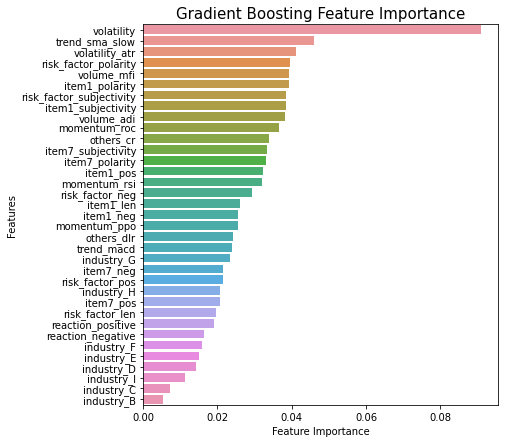

In [ ]:
fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X.columns, 'Feature Importance': gb_classifier.feature_importances_}).sort_values("Feature Importance", ascending = False)
sns.barplot(y = "Features", x = "Feature Importance", data = feat_imp)
ax1.set_title("Gradient Boosting Feature Importance", size = 15)

### Model Agnostic Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

#### Xgboost

In [ ]:
xgb_result = permutation_importance(
    xgb_classifier, X_test, y_test, n_repeats = 10, random_state = 42, n_jobs = -1)
sorted_idx_xgb = xgb_result.importances_mean.argsort()

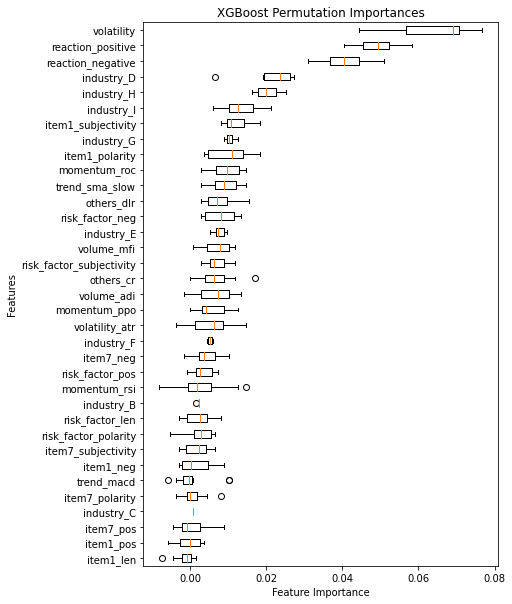

In [ ]:
fig = plt.figure(figsize = (14, 10))
ax = plt.subplot(121)
ax.boxplot(
    xgb_result.importances[sorted_idx_xgb].T, vert = False, labels = X_test_df.columns[sorted_idx_xgb]
)
ax.set_title("XGBoost Permutation Importances")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#### LightGBM

In [ ]:
lgb_result = permutation_importance(
    lgbm_classifier, X_test, y_test, n_repeats = 10, random_state = 42, n_jobs = -1
)
sorted_idx_lgb = lgb_result.importances_mean.argsort()

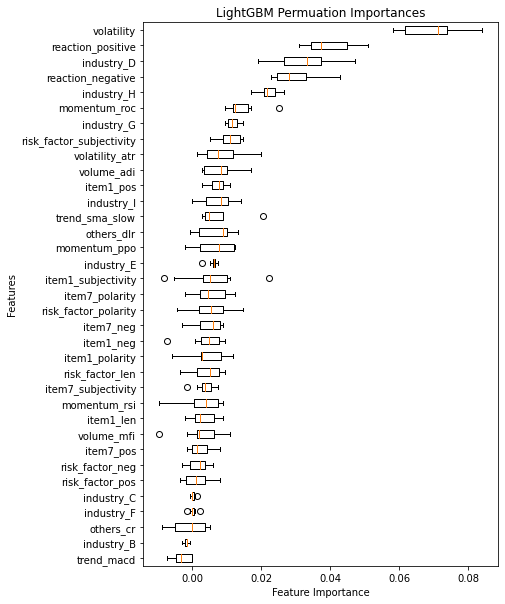

In [ ]:
fig = plt.figure(figsize = (14, 10))
ax = plt.subplot(121)
ax.boxplot(
    lgb_result.importances[sorted_idx_lgb].T, vert = False, labels = X_test_df.columns[sorted_idx_lgb]
)
ax.set_title("LightGBM Permuation Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

#### Random Forest

In [ ]:
rf_result = permutation_importance(
    rf_classifier, X_test, y_test, n_repeats = 10, random_state = 42, n_jobs = -1
)
sorted_idx_rf = rf_result.importances_mean.argsort()

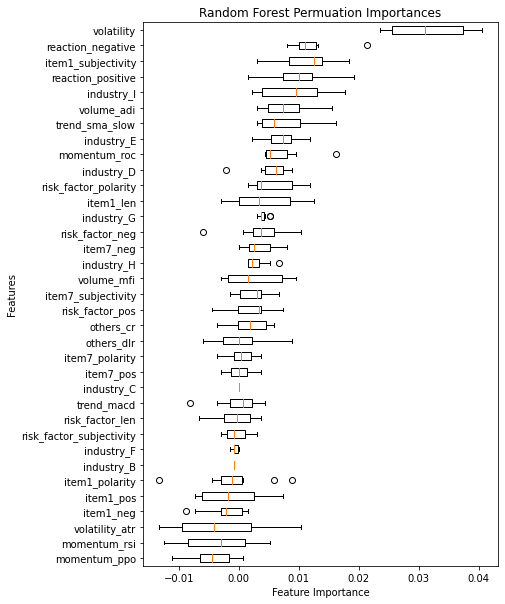

In [ ]:
fig = plt.figure(figsize = (14, 10))
ax = plt.subplot(121)
ax.boxplot(
    rf_result.importances[sorted_idx_rf].T, vert = False, labels = X_test_df.columns[sorted_idx_rf]
)
ax.set_title("Random Forest Permuation Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

#### Decision Tree

In [ ]:
dt_result = permutation_importance(
    tree_classifier, X_test, y_test, n_repeats = 10, random_state = 42, n_jobs = -1
)
sorted_idx_dt = dt_result.importances_mean.argsort()

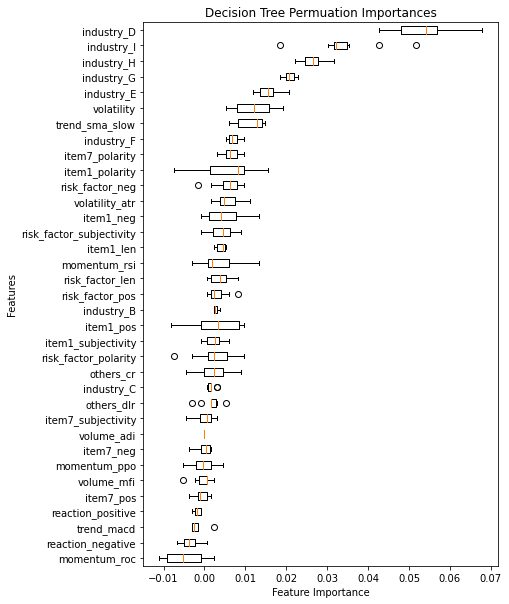

In [ ]:
fig = plt.figure(figsize = (14, 10))
ax = plt.subplot(121)
ax.boxplot(
    dt_result.importances[sorted_idx_dt].T, vert = False, labels = X_test_df.columns[sorted_idx_dt]
)
ax.set_title("Decision Tree Permuation Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

#### Gradient Boosting

In [ ]:
# Perform model agnostic feature importance on gradient boosting method
gb_result = permutation_importance(
    gb_classifier, X_test, y_test, n_repeats = 10, random_state = 42, n_jobs = -1)
sorted_idx_gb = gb_result.importances_mean.argsort()

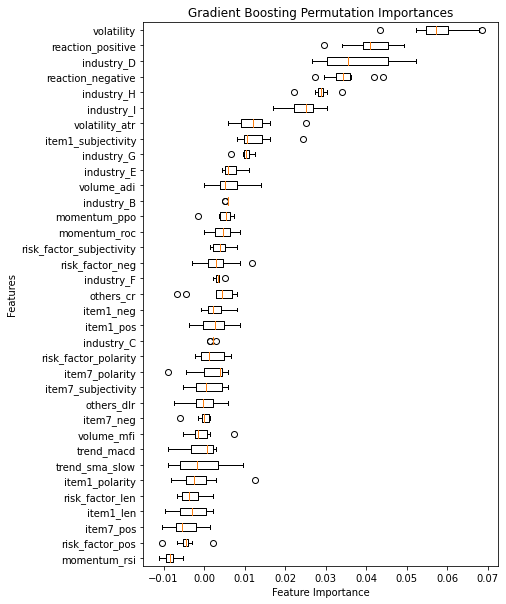

In [ ]:
fig = plt.figure(figsize = (14, 10))
ax = plt.subplot(121)
ax.boxplot(
    gb_result.importances[sorted_idx_gb].T, vert = False, labels = X_test_df.columns[sorted_idx_gb]
)
ax.set_title("Gradient Boosting Permutation Importances")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

## Section 2 Feature Filter

### Section 2.1 Genetic Algorithms

In [ ]:
!pip install feature_selection_ga
from feature_selection_ga import FeatureSelectionGA, FitnessFunction
from sklearn.datasets import make_classification
from sklearn import linear_model

     |████████████████████████████████| 160 kB 5.5 MB/s 


In [ ]:
fsga = FeatureSelectionGA(xgb_classifier, X_train, y_train, ff_obj = FitnessFunction())

In [ ]:
#pop = fsga.generate(5420)

(5420, 35)

### Section 2.2  Variance Method

In [ ]:
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
import numpy as np

In [ ]:
# 2018.11.17 Created by Eamon.Zhang

def constant_feature_detect(data,threshold=0.98):
    """ detect features that show the same value for the 
    majority/all of the observations (constant/quasi-constant features)
    
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable as constant
        
    Returns
    -------
    list of variables names
    """
    
    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / np.float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),' variables are found to be almost constant')    
    return quasi_constant_feature

In [ ]:
constant_feature = constant_feature_detect(X_train_df, threshold = 0.9)

5  variables are found to be almost constant


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
print(constant_feature)

['industry_B', 'industry_C', 'industry_E', 'industry_F', 'industry_G']


### Section 2.3 Correlation Method

In [ ]:
# 2018.11.17 Created by Eamon.Zhang
def corr_feature_detect(data,threshold=0.8):
    """ detect highly-correlated features of a Dataframe
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable correlated
        
    Returns
    -------
    pairs of correlated variables
    """
    
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] # remove the digonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            # find all features correlated to a single feature
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            # append the block of features to the list
            correlated_groups.append(correlated_block)
    return correlated_groups

In [ ]:
corr = corr_feature_detect(data = X_train_df, threshold = 0.9)

In [ ]:
for i in corr:
    print(i, '\n')

     feature1   feature2      corr
0   item7_pos  item1_len  0.988012
12  item7_pos  item7_neg  0.933260 

           feature1         feature2      corr
2   risk_factor_pos  risk_factor_len  0.985026
17  risk_factor_pos  risk_factor_neg  0.932034 

            feature1           feature2     corr
4  reaction_positive  reaction_negative  0.98491 

         feature1        feature2      corr
6  trend_sma_slow  volatility_atr  0.967223 

        feature1    feature2      corr
14  momentum_ppo  others_dlr  0.932207 



### Section 2.4 Mutual Information Filter

In [ ]:
# 2018.11.17 Created by Eamon.Zhang
def mutual_info(X,y,select_k=10):
    
#    mi = mutual_info_classif(X,y)
#    mi = pd.Series(mi)
#    mi.index = X.columns
#    mi.sort_values(ascending=False)
    
    if select_k >= 1:
        sel_ = SelectKBest(mutual_info_classif, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
        scores = sel_.scores_
        
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(mutual_info_classif, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
        scores = sel_.scores_
        
    else:
        raise ValueError("select_k must be a positive number")
    
    return col, scores

In [ ]:
mi = mutual_info(X_train_df, y_train_df, select_k = 22)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mi_scores = mi[1]

Text(0.5, 1.0, 'Mutual Information Feature Importance')

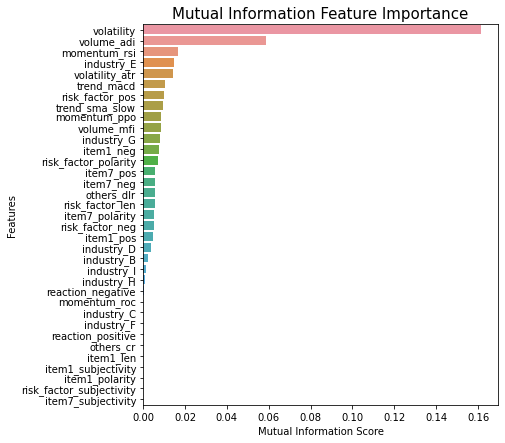

In [ ]:
fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X.columns, 'Mutual Information Score': mi_scores}).sort_values("Mutual Information Score", ascending = False)
sns.barplot(y = "Features", x = "Mutual Information Score", data = feat_imp)
ax1.set_title("Mutual Information Feature Importance", size = 15)

### Section 2.5 Chi-Square Filter

In [ ]:
# 2018.11.17 Created by Eamon.Zhang
def chi_square_test(X,y,select_k=10):
   
    """
    Compute chi-squared stats between each non-negative feature and class.
    This score should be used to evaluate categorical variables in a classification task
    """
    if select_k >= 1:
        sel_ = SelectKBest(chi2, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
        scores = sel_.scores_
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(chi2, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
        scores = sel_.scores_
    else:
        raise ValueError("select_k must be a positive number")  
    
    return col, scores

In [ ]:
# Failed because of many negative columns
chi = chi_square_test(X_train_df, y_train_df, select_k = 10)
chi_score = chi[1]

ValueError: Input X must be non-negative.

### Section 2.6 ROC_AUC

In [ ]:
# 2018.11.17 Created by Eamon.Zhang
def univariate_roc_auc(X_train,y_train,X_test,y_test,threshold):
   
    """
    First, it builds one decision tree per feature, to predict the target
    Second, it makes predictions using the decision tree and the mentioned feature
    Third, it ranks the features according to the machine learning metric (roc-auc or mse)
    It selects the highest ranked features
    """
    roc_values = []
    for feature in X_train.columns:
        clf = DecisionTreeClassifier()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict_proba(X_test[feature].to_frame())
        roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    roc_values = pd.Series(roc_values)
    roc_values.index = X_train.columns
    print(roc_values.sort_values(ascending=False))
    print(len(roc_values[roc_values > threshold]),'out of the %s featues are kept'% len(X_train.columns))
    keep_col = roc_values[roc_values > threshold]
    return keep_col, roc_values

In [ ]:
uni_roc_auc = univariate_roc_auc(X_train_df, y_train_df, X_test_df, y_test_df, threshold = 0.75)

volatility                  0.772619
volume_adi                  0.594149
reaction_positive           0.545021
volume_mfi                  0.535906
industry_I                  0.534226
reaction_negative           0.533937
item7_subjectivity          0.531032
industry_D                  0.528804
trend_macd                  0.525684
risk_factor_neg             0.522762
industry_H                  0.519455
momentum_roc                0.518485
industry_E                  0.517051
others_dlr                  0.515568
momentum_rsi                0.514868
industry_G                  0.514100
momentum_ppo                0.513718
risk_factor_polarity        0.513623
volatility_atr              0.510713
item1_pos                   0.510491
industry_C                  0.504709
item1_subjectivity          0.504560
item7_neg                   0.503314
industry_F                  0.501346
trend_sma_slow              0.501237
item1_polarity              0.499123
item7_polarity              0.497926
i

In [ ]:
roc_scores = uni_roc_auc[1]

Text(0.5, 1.0, 'ROC-AUC Feature Importance')

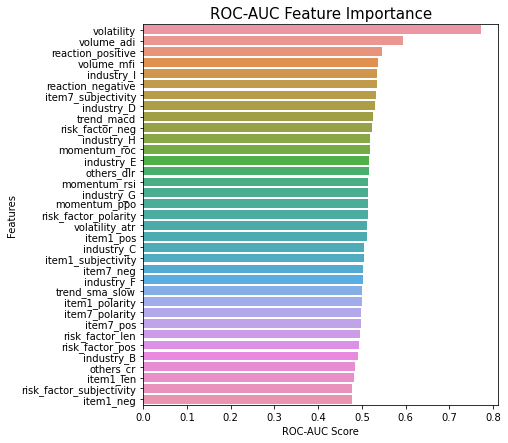

In [ ]:
fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X.columns, 'ROC-AUC Score': roc_scores}).sort_values("ROC-AUC Score", ascending = False)
sns.barplot(y = "Features", x = "ROC-AUC Score", data = feat_imp)
ax1.set_title("ROC-AUC Feature Importance", size = 15)

### Section 2.7 more ROC-AUC

In [ ]:
# Since volatility gives us a very good ROC-AUC Score, we will try to examine 
# what the score will be after pairing volatility with another feature
def advanced_roc_auc(X_train,y_train,X_test,y_test,threshold, clf):
   
    """
    First, it builds one decision tree per feature, to predict the target
    Second, it makes predictions using the decision tree and the mentioned feature
    Third, it ranks the features according to the machine learning metric (roc-auc or mse)
    It selects the highest ranked features
    """
    roc_values = []
    for feature in X_train.columns:
        if feature != 'volatility':
            clf.fit(X_train[[feature, 'volatility']], y_train)
            y_scored = clf.predict_proba(X_test[[feature, 'volatility']])
            roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    roc_values = pd.Series(roc_values)
    roc_values.index = [col_name + ' & volatility' for col_name in X_train.columns if col_name != 'volatility']
    print(roc_values.sort_values(ascending=False))
    print(len(roc_values[roc_values > threshold]),'out of the %s featues are kept'% len(X_train.columns))
    keep_col = roc_values[roc_values > threshold]
    return keep_col, roc_values

In [ ]:
adv_roc_auc = advanced_roc_auc(X_train_df, y_train, X_test_df, y_test, threshold = 0.75, clf = gb_classifier)

industry_G & volatility                  0.780818
industry_C & volatility                  0.772630
industry_E & volatility                  0.772607
industry_I & volatility                  0.772080
industry_H & volatility                  0.771889
industry_D & volatility                  0.767656
industry_F & volatility                  0.766936
industry_B & volatility                  0.765241
volume_adi & volatility                  0.759974
reaction_positive & volatility           0.745079
reaction_negative & volatility           0.745017
item7_pos & volatility                   0.739273
others_cr & volatility                   0.735479
risk_factor_polarity & volatility        0.733778
item1_pos & volatility                   0.733456
risk_factor_subjectivity & volatility    0.732619
item7_polarity & volatility              0.731753
others_dlr & volatility                  0.729171
momentum_ppo & volatility                0.727719
trend_macd & volatility                  0.727375


In [ ]:
adv_roc_auc_scores = adv_roc_auc[1]

Text(0.5, 1.0, 'ROC-AUC Paired Feature Importance')

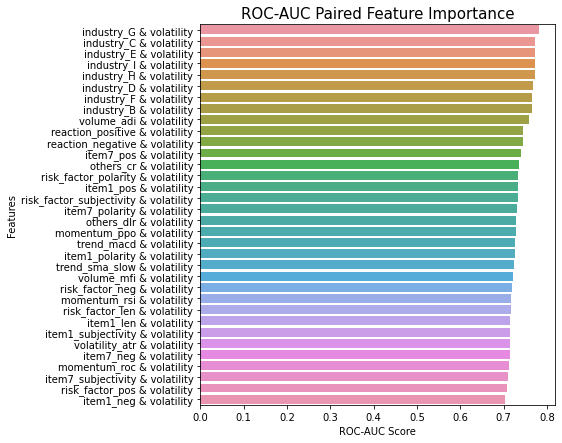

In [ ]:
fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
new_feature_names = [col_name + ' & volatility' for col_name in X_train_df.columns if col_name != 'volatility']
feat_imp = pd.DataFrame({'Features': new_feature_names, 'ROC-AUC Score': adv_roc_auc_scores}).sort_values("ROC-AUC Score", ascending = False)
sns.barplot(y = "Features", x = "ROC-AUC Score", data = feat_imp)
ax1.set_title("ROC-AUC Paired Feature Importance", size = 15)

## Drop some features

Based on mutual information filter and correlation between columns.

In [ ]:
useful_column = mi[0]

In [ ]:
new_X_train_df = X_train_df[useful_column]
new_X_test_df = X_test_df[useful_column]

In [ ]:
new_X_train_df.columns

Index(['volatility', 'volume_adi', 'volume_mfi', 'volatility_atr',
       'trend_sma_slow', 'trend_macd', 'momentum_rsi', 'momentum_ppo',
       'others_dlr', 'risk_factor_pos', 'risk_factor_neg',
       'risk_factor_polarity', 'risk_factor_len', 'item1_pos', 'item1_neg',
       'item7_pos', 'item7_neg', 'item7_polarity', 'industry_B', 'industry_D',
       'industry_E', 'industry_G'],
      dtype='object')

In [ ]:
corr_columns = ['item1_len', 'risk_factor_len', 'trend_sma_slow', 'others_dlr']

In [ ]:
for col_name in corr_columns:
    if col_name in new_X_train_df.columns:
        new_X_train_df = new_X_train_df.drop(col_name, axis = 1)
        new_X_test_df = new_X_test_df.drop(col_name, axis = 1)
        

In [ ]:
print(new_X_train_df.columns)

Index(['volatility', 'volume_adi', 'volume_mfi', 'volatility_atr',
       'trend_macd', 'momentum_rsi', 'momentum_ppo', 'risk_factor_pos',
       'risk_factor_neg', 'risk_factor_polarity', 'item1_pos', 'item1_neg',
       'item7_pos', 'item7_neg', 'item7_polarity', 'industry_B', 'industry_D',
       'industry_E', 'industry_G'],
      dtype='object')


In [ ]:
standardizer = StandardScaler()
X_train = standardizer.fit_transform(new_X_train_df) 
X_test = standardizer.transform(new_X_test_df) 

Run our model again.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import numpy as np

folds = StratifiedKFold(n_splits = 5)
def get_oof(clf ,x_train, y_train, x_test, n_folds = 5):
    """K-fold stacking"""
    ntrain = X_train.shape[0]
    ntest =  X_test.shape[0]
    classnum = len(np.unique(y_train))
    oof_test_skf = np.empty((5, ntest))
    kf = KFold(n_splits=n_folds)
    oof_train = np.zeros((ntrain,classnum))
    oof_test = np.zeros((ntest,classnum))
        
    for i,(train_index,test_index) in enumerate(kf.split(X_train)):
        #print(type(train_index))
        
        kf_X_train = X_train[train_index] # 数据
        kf_y_train = y_train[train_index] # 标签
        
        kf_X_test = X_train[test_index]  # k-fold的验证集
        
        clf.fit(kf_X_train, kf_y_train)
        
        oof_train[test_index] = clf.predict_proba(kf_X_test)
        #oof_test_skf[i,:]=clf.predict_proba(X_test)[:,0]
        oof_test += clf.predict_proba(X_test)
    oof_test = oof_test/float(n_folds)
    return oof_train, oof_test

In [ ]:
# new feature input level1
import functools 
newfeature_list_1 = []
newtestdata_list_1 = []
xgb_oof_train_1, xgb_oof_test_1 = get_oof(xgb_classifier,X_train, y_train.values, X_test)
newfeature_list_1.append(xgb_oof_train_1)
newtestdata_list_1.append(xgb_oof_test_1)

lgbm_oof_train_1, xgb_oof_test_1 = get_oof(lgbm_classifier,X_train, y_train.values, X_test)
newfeature_list_1.append(lgbm_oof_train_1)
newtestdata_list_1.append(xgb_oof_test_1)

rf_oof_train_1, rf_oof_test_1 = get_oof(rf_classifier,X_train, y_train.values, X_test)
newfeature_list_1.append(rf_oof_train_1)
newtestdata_list_1.append(rf_oof_test_1)

dt_oof_train_1, dt_oof_test_1 = get_oof(tree_classifier,X_train, y_train.values, X_test)
newfeature_list_1.append(dt_oof_train_1)
newtestdata_list_1.append(dt_oof_test_1)

gb_oof_train_1, gb_oof_test_1 = get_oof(gb_classifier,X_train, y_train.values, X_test)
newfeature_list_1.append(gb_oof_train_1)
newtestdata_list_1.append(gb_oof_test_1)

In [ ]:
newfeature_1 = functools.reduce(lambda x,y:np.concatenate((x,y),axis=1),newfeature_list_1)    
newtestdata_1 =functools.reduce(lambda x,y:np.concatenate((x,y),axis=1),newtestdata_list_1)

In [ ]:
from sklearn.svm import SVC
svr = SVC(kernel = 'rbf',C=1, gamma = 'scale',probability=True)
svr.fit(newfeature_1, y_train)
pred_2 = svr.predict(newtestdata_1)
accuracy_2 = accuracy_score(y_test, pred_2)
print(accuracy_2)
#c=10 0.7640117994100295
#5 c =1  0.775811209439528

0.7441002949852508


In [ ]:
X_train.shape

(5420, 19)